In [125]:
import xgboost
import numpy as np
import pandas as pd
import csv
import math
import random
import pickle
import matplotlib.pyplot as plt
import sklearn

In [126]:
training_df = pd.read_csv('data-1-year.csv')
y = training_df['price']
X = training_df.drop('price', axis=1)

In [127]:
training_df = pd.read_csv('data-10-year.csv')
y = training_df['price']
X = training_df.drop('price', axis=1)

In [128]:
def train_val_split(X, y, val_size, random_state):
    # TODO: implement your own train_val_split
    
    
    X_train = X.sample(frac = 0.9,random_state = random_state)
    X_temp = X.drop(X_train.index)
    y_train = y.sample(frac = 0.9,random_state = random_state)
    y_temp = y.drop(y_train.index)
    
    X_val = X_temp.sample(frac = 0.5,random_state = random_state)
    X_test = X_temp.drop(X_val.index)
    y_val = y_temp.sample(frac = 0.5,random_state = random_state)
    y_test = y_temp.drop(y_val.index) 
    return X_train, X_val, X_test, y_train, y_val, y_test

In [129]:
random_state = random.getstate()[1][0]

X_train, X_val, X_test, y_train, y_val, y_test = train_val_split(X, y, X.size, random_state)

print(X_train)
#print(y_train)

        longitude   latitude  house_age    area  elevator  janitor  \
46804  120.947039  24.834882          1   29.60         1        1   
27988  120.975636  24.814981         29  109.48         1        1   
60256  120.962916  24.774982         21  122.19         1        1   
28137  121.020966  24.785449          1   36.68         1        0   
55077  120.945108  24.793999          1   38.89         1        1   
...           ...        ...        ...     ...       ...      ...   
21935  120.948783  24.804952          4   45.26         1        1   
35097  120.979494  24.813492          1   48.64         1        1   
51390  120.931155  24.842459          1   50.97         1        1   
37634  120.987537  24.803886          1   59.57         1        0   
18802  120.965771  24.822509          1   39.88         1        1   

       parking_space  closing_year  bedroom  living_room  ...  \
46804              0           105        2            2  ...   
27988              0         

In [191]:

params = {'learning_rate': 0.1, 'n_estimators': 558, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 1, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 2048, 'reg_lambda': 1,"early_stopping_rounds":20}
cv_params = {'learning_rate': [0.1/(2**i) for i in range(10)]}
xgb = xgboost.XGBRegressor(**params)



In [192]:
grid = sklearn.model_selection.GridSearchCV(estimator=xgb, param_grid=cv_params, scoring='r2', verbose=4,cv = 10)
grid.fit(X_train, y_train,
         
        eval_set=[(X_val, y_val)],
        verbose=False)
print('参数的最佳取值：{0}'.format(grid.best_params_))
print('最佳模型得分:{0}'.format(grid.best_score_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ................learning_rate=0.1;, score=0.604 total time=   1.8s
[CV 2/10] END ................learning_rate=0.1;, score=0.877 total time=   2.9s
[CV 3/10] END ................learning_rate=0.1;, score=0.804 total time=   1.3s
[CV 4/10] END ................learning_rate=0.1;, score=0.798 total time=   2.4s
[CV 5/10] END ................learning_rate=0.1;, score=0.620 total time=   2.9s
[CV 6/10] END ................learning_rate=0.1;, score=0.795 total time=   3.1s
[CV 7/10] END ................learning_rate=0.1;, score=0.846 total time=   2.6s
[CV 8/10] END ................learning_rate=0.1;, score=0.845 total time=   3.2s
[CV 9/10] END ................learning_rate=0.1;, score=0.687 total time=   1.6s
[CV 10/10] END ...............learning_rate=0.1;, score=0.615 total time=   2.6s
[CV 1/10] END ...............learning_rate=0.05;, score=0.544 total time=   3.2s
[CV 2/10] END ...............learning_rate=0.0

In [193]:
# score = xgb.score(X_train,y_train)
# predictions = xgb.predict(X_train)
# mse = ((predictions - y_train)**2).sum()
# print(abs((predictions - y_train)/y_train).sum())
# print(score,math.sqrt(mse/len(predictions)),mse/(1-score)/len(predictions))

# score = xgb.score(X_val,y_val)
# predictions = xgb.predict(X_val)
# mse = ((predictions - y_val)**2).sum()
# print(abs((predictions - y_val)/y_val).sum())
# print(score,math.sqrt(mse/len(predictions)),mse/(1-score)/len(predictions))
xgb.fit(X_train,y_train, eval_set=[(X_val, y_val)],verbose=False)
score = xgb.score(X_test,y_test)
predictions = xgb.predict(X_test)
mse = ((predictions - y_test)**2).sum()
print(abs((predictions - y_test)/y_test).sum())
print(score,math.sqrt(mse/len(predictions)),mse/(1-score)/len(predictions))


501.4282673587183
0.8437299301371061 4177207.55537603 111659660586315.77


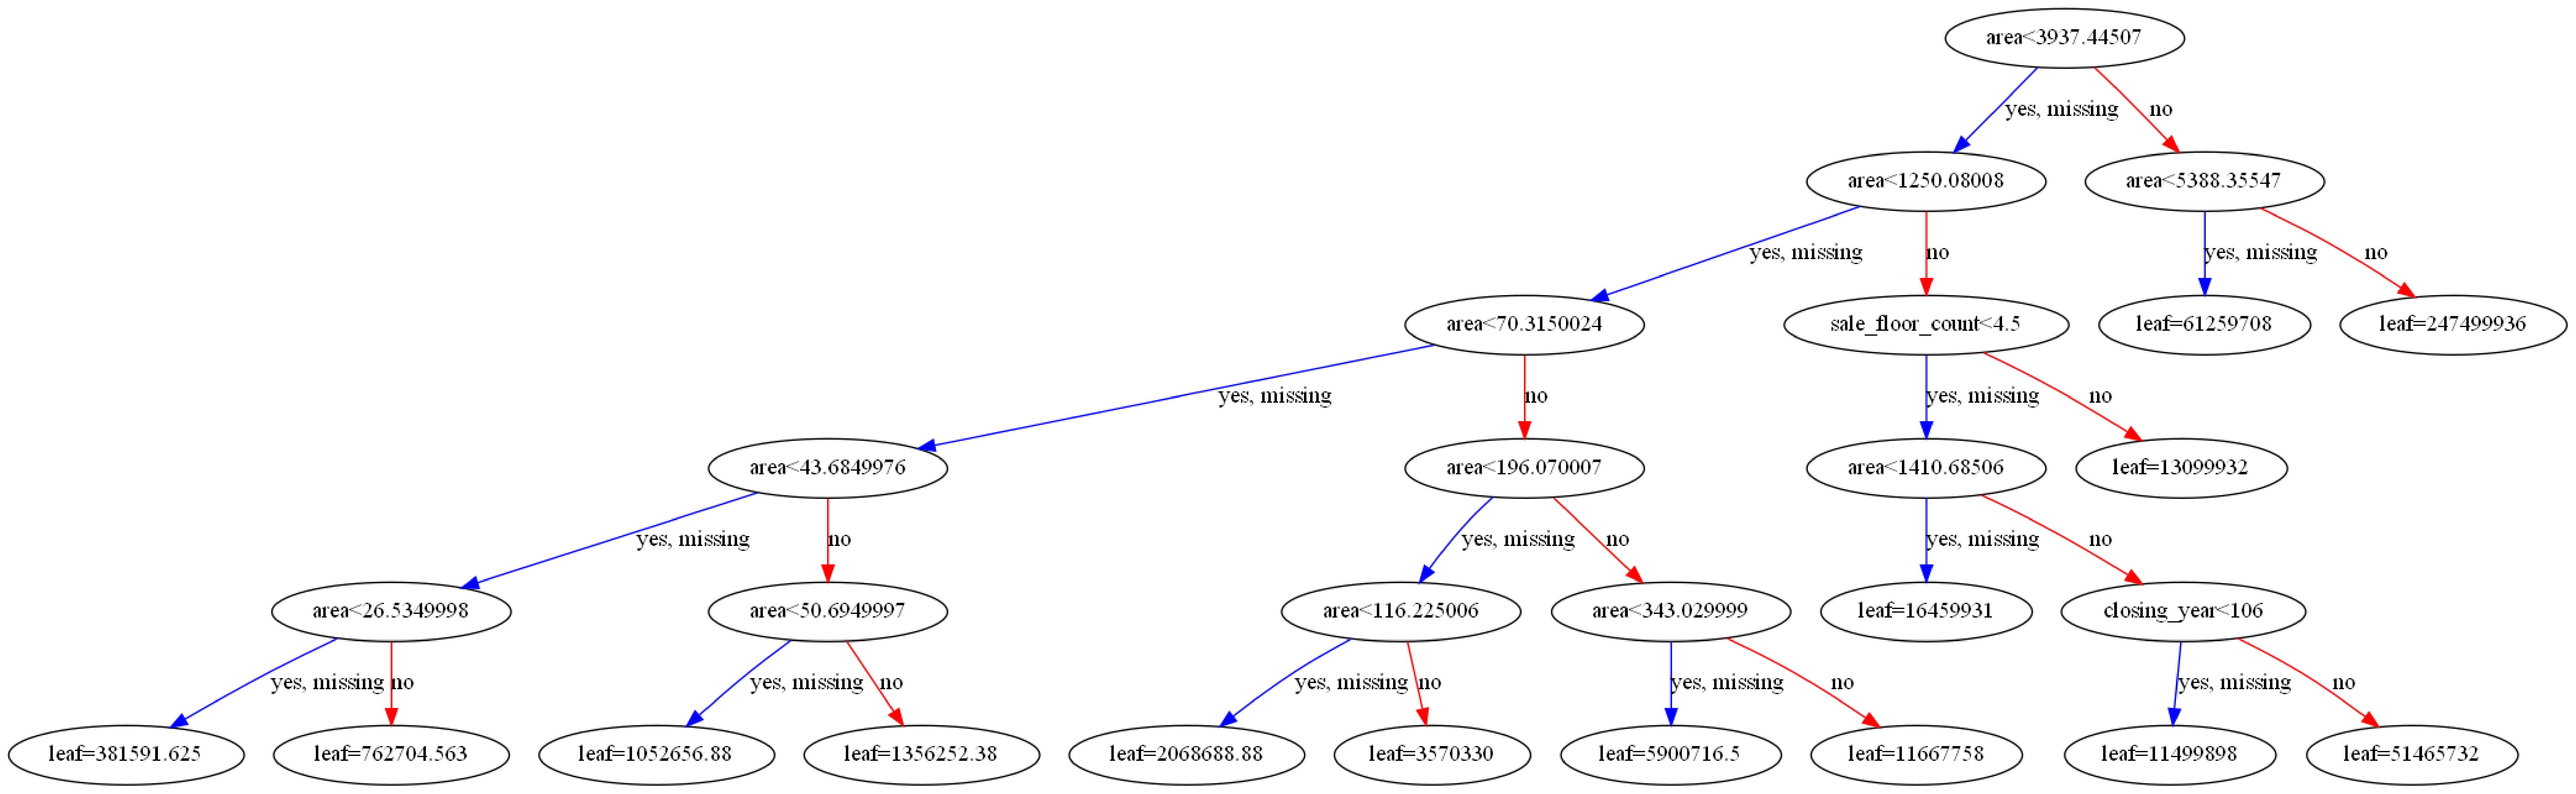

In [194]:
from graphviz import Digraph
from xgboost import plot_tree
import matplotlib.pyplot as plt

# 創建呈現在每一棵樹上的feature name
def create_feature_map(features):
    outfile = open("xgb.fmap", "w")
    i = 0
    for feat in features:
        outfile.write("{0}\t{1}\tq\t".format(i, feat))
        i = i+1
    outfile.close

create_feature_map(X_train.columns)
plot_tree(xgb, # 引入上面訓練好的xgb model 
          num_trees=0, # 第幾棵樹
          fmap="xgb.fmap") # 引入feature name

fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()